In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from itertools import takewhile

In [2]:
import math

def format_exp (number, decimals=2):
    def exp_(f):
        return int(math.floor(math.log10(abs(f)))) if f != 0 else 0
    
    exponent = exp_(number)
    mantissa = number / 10**exponent
    
    return "%%.%if" % decimals % mantissa + "$\\times 10^{%s}$" % exponent

In [3]:
data = pd.read_csv ("B4_h1_Eabs.csv", comment="#")
data

,entries,Sw,Sw2,Sxw0,Sx2w0
0,0,0,0,0.000000,0.000000
1,1,1,1,0.000000,0.000000
2,0,0,0,0.000000,0.000000
3,1,1,1,0.022189,0.000492
4,0,0,0,0.000000,0.000000
...,...,...,...,...,...
97,0,0,0,0.000000,0.000000
98,0,0,0,0.000000,0.000000
99,0,0,0,0.000000,0.000000
100,0,0,0,0.000000,0.000000


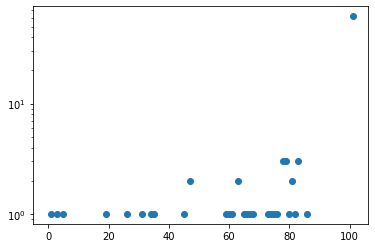

In [4]:
plt.plot(data["Sw"], "o")
plt.yscale("log")

In [4]:
data["Sxw0"].sum()

805157.75578

In [8]:
data = pd.read_csv ("B4_nt_B4_t0.csv", comment="#", header=None)
for i in range(1, 4):
    data = data.append(pd.read_csv ("B4_nt_B4_t%i.csv" % i, comment="#", header=None))

data

,0,1
0,1.000000,0.714404
1,1.000000,0.889875
2,1.000000,0.991532
3,1.000000,0.947511
4,0.623312,0.613005
...,...,...
24169,1.000000,0.821326
24170,1.000000,0.897118
24171,0.737888,0.604436
24172,0.742466,0.743795


In [9]:
from scipy.signal import argrelmax

def plot_peaks(x, y, ylim, diff=100):
    
    inds = argrelmax(y, order=50)[0]
    
    print(inds)
    
    for ind in inds:
        plt.text(x[ind], min(y[ind], ylim)*0.9, "E = %.2f ->" % x[ind], horizontalalignment="right")

[]


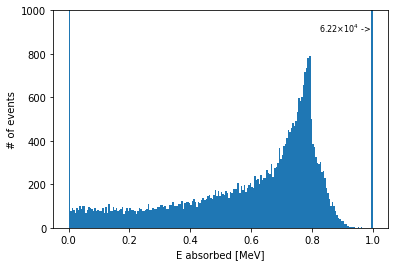

In [11]:
use_data = data[0]#[data[0] > 8]

vals, bins, _ = plt.hist(use_data, 200);

ylim  = vals[1:-1].max() * 1.1
ylim=1000
x_max = data[0].max()

plt.ylim(0,ylim)
plt.xlabel("E absorbed [MeV]")
plt.ylabel("# of events")

#plt.text(0     + 0.005, ylim * 0.9, "<- %s" % format_exp(vals[0]),  horizontalalignment='left',  fontsize=8)
plt.text(x_max - 0.005, ylim * 0.9, "%s ->" % format_exp(vals[-1]), horizontalalignment='right', fontsize=8)

plot_peaks(bins[:-1], vals, ylim)

plt.savefig("e_dist_10MeV.svg")

pass;

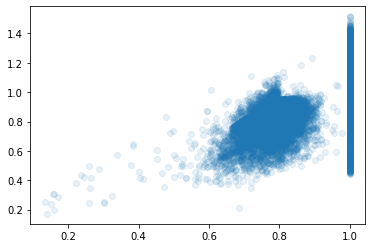

In [106]:
plt.plot(data[0], data[1], "o", alpha=0.1)

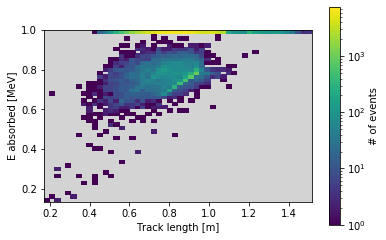

In [107]:
from matplotlib.colors import LogNorm

plt.hist2d(data[1], data[0], 50, norm=LogNorm());
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_facecolor("lightgray")
colbar = plt.colorbar();
colbar.set_label("# of events")

plt.xlabel("Track length [m]")
plt.ylabel("E absorbed [MeV]")

plt.savefig("track_length_vs_e_abs_100cm.svg")

pass;

In [20]:
len(data[data[0]==0])

4815

In [21]:
data

,0,1
0,1.000000,0.714404
1,1.000000,0.889875
2,1.000000,0.991532
3,1.000000,0.947511
4,0.623312,0.613005
...,...,...
24169,1.000000,0.821326
24170,1.000000,0.897118
24171,0.737888,0.604436
24172,0.742466,0.743795


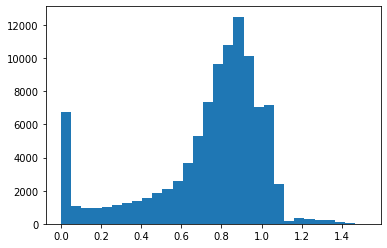

In [15]:
plt.hist(data[1], bins=30);

In [108]:
from scipy.stats import binned_statistic

avg, edges, _ = binned_statistic(data[0], data[1], 'mean', bins=50)
x_ = edges[:-1]

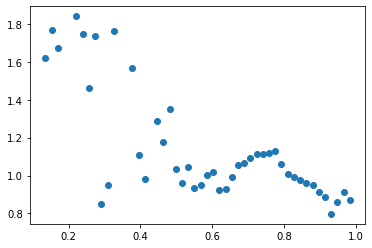

In [109]:
plt.plot(x_, avg/x_, "o")

In [160]:
def load_header_params(fname):
    with open(fname) as file:
        return {name: value for [name, value] in [comment_line.strip()[1:].split(maxsplit=1) for comment_line in takewhile(lambda line: line.strip()[0] == "#", file)]}

def load_histo_1(fname):
    header_params = load_header_params (fname)
    header_params["axis"] = header_params["axis"].split()
    
    if not (header_params["axis"] and header_params["axis"][0] == "fixed"):
        raise Exception("No fixed axis found")
    
    bin_num, low, high = header_params["axis"][1:]
    bin_num, low, high = int(bin_num), float(low), float(high)
    bin_width = (high - low) / bin_num
    
    histo = pd.read_csv(fname, comment="#")
    
    histo = histo[1:-1]
    
    histo["bin_left"]  = np.linspace(low, high, bin_num)
    histo["bin_right"] = histo["bin_left"] + bin_width
    
    return histo

In [161]:
load_header_params("B4_h1_Eabs.csv")

{'class': 'tools::histo::h1d',
 'title': 'Edep in absorber',
 'dimension': '1',
 'axis': 'fixed 300 0 1',
 'annotation': 'axis_x.title',
 'bin_number': '302'}

In [165]:
load_histo_1("B4_h1_Eabs.csv")

,entries,Sw,Sw2,Sxw0,Sx2w0,bin_left,bin_right
1,4,4,4,0.006,0.000014,0.000000,0.003333
2,3,3,3,0.015,0.000077,0.003344,0.006678
3,3,3,3,0.024,0.000194,0.006689,0.010022
4,4,4,4,0.046,0.000534,0.010033,0.013367
5,3,3,3,0.045,0.000677,0.013378,0.016711
...,...,...,...,...,...,...,...
296,0,0,0,0.000,0.000000,0.986622,0.989955
297,0,0,0,0.000,0.000000,0.989967,0.993300
298,0,0,0,0.000,0.000000,0.993311,0.996644
299,0,0,0,0.000,0.000000,0.996656,0.999989


In [151]:
"asd asd vb".split(maxsplit=1)

['asd', 'asd vb']

In [123]:
np.append( np.linspace(start=0,stop=100,num=100), np.array(100+1) )

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63

In [ ]:
def load_tuples(base_name):
    